<a href="https://colab.research.google.com/github/satyaaakash/LungCancerPrediction/blob/main/lung_cancer_sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import warnings
warnings.filterwarnings("ignore")

Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [ ]:


#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Book1.xlsx to Book1.xlsx


In [ ]:
#Read the training & test data
import io
lung_df = pd.read_excel('cancer patient data sets.xlsx')

In [ ]:
#Pandas head() method is used to return top n (5 by default) rows of a data frame or series.
lung_df.head()


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
#Describe gives statistical information about NUMERICAL columns in the dataset
lung_df.describe(include='all')



,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,P1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,NaN,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,NaN
std,NaN,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,NaN
min,NaN,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN
50%,NaN,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,NaN
75%,NaN,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,NaN


In [ ]:
#Which features are available in the dataset?
lung_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
#Check for any null values
lung_df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Number of patients diagnosed with lung disease with low risk:  365
Number of patients not diagnosed with lung disease with average risk:  332
Number of patients not diagnosed with lung disease with high risk:  303


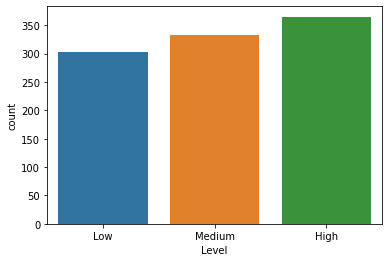

In [ ]:
#Data Visualization with classification of people with lung disease with all levels of risk.
sns.countplot(data=lung_df, x = 'Level', label='Count')

LD, NLD,hld = lung_df['Level'].value_counts()
print('Number of patients diagnosed with lung disease with low risk: ',LD)
print('Number of patients not diagnosed with lung disease with average risk: ',NLD)
print('Number of patients not diagnosed with lung disease with high risk: ',hld)

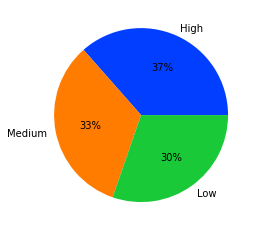

In [ ]:
values = lung_df['Level'].value_counts().tolist()
names = list(dict(lung_df['Level'].value_counts()).keys())

colors = sns.color_palette('bright')
plt.figure()
plt.pie(values, labels=names,colors = colors, autopct = '%0.0f%%')
plt.show()

Number of patients that are male:  598
Number of patients that are female:  402


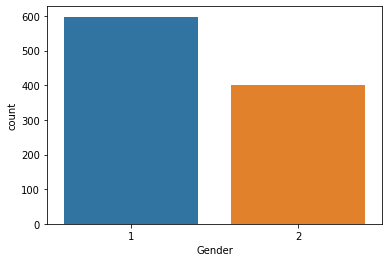

In [ ]:
#datavisualized with male and female classification
sns.countplot(data=lung_df, x = 'Gender', label='Count')

M, F = lung_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

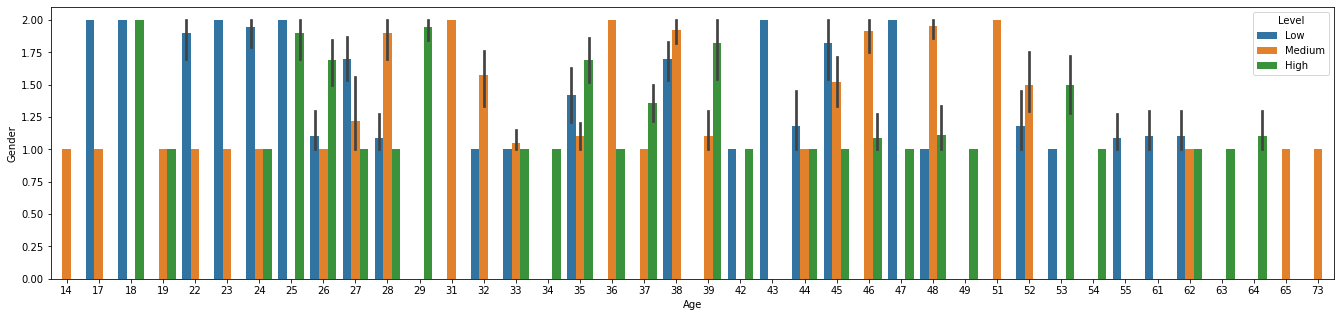

In [ ]:
#graph shown is   classifaction of age using male and female dataset
plt.figure(figsize=(23, 5))
sns.barplot(x="Age", y="Gender", hue="Level", data=lung_df);
#Age seems to be a factor for lung disease for both male and female genders

In [ ]:
#data groups with lung patients of all levels of stages in cancer with gender
lung_df[['Gender', 'Level','Age']].groupby(['Level','Gender'], as_index=False).count().sort_values(by='Level', ascending=False)

,Level,Gender,Age
4,Medium,1,197
5,Medium,2,135
2,Low,1,149
3,Low,2,154
0,High,1,252
1,High,2,113


In [ ]:
lung_df[['Gender', 'Level','Age']].groupby(['Level','Gender'], as_index=False).mean().sort_values(by='Level', ascending=False)

,Level,Gender,Age
4,Medium,1,37.827411
5,Medium,2,39.777778
2,Low,1,40.765101
3,Low,2,30.233766
0,High,1,39.257937
1,High,2,33.000000


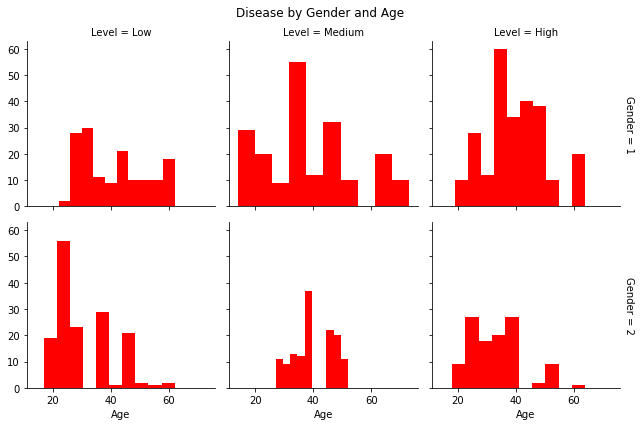

In [ ]:
g = sns.FacetGrid(lung_df, col="Level", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

In [ ]:
#age is not to important on level of cancer.

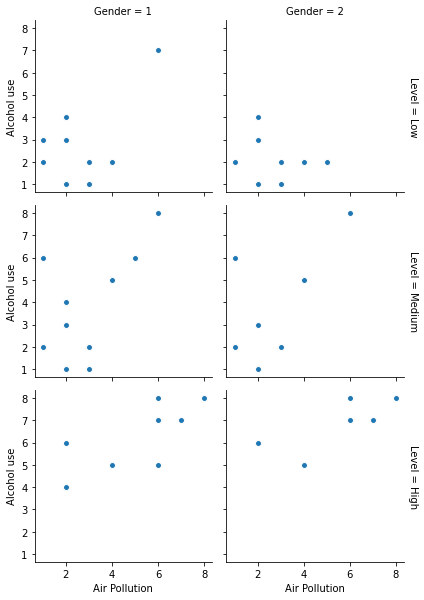

In [ ]:
g = sns.FacetGrid(lung_df, col="Gender", row="Level", margin_titles=True)
g.map(plt.scatter,"Air Pollution", "Alcohol use", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [ ]:
#There seems to be no direct relationship between Air Pollution  and alcohol use.

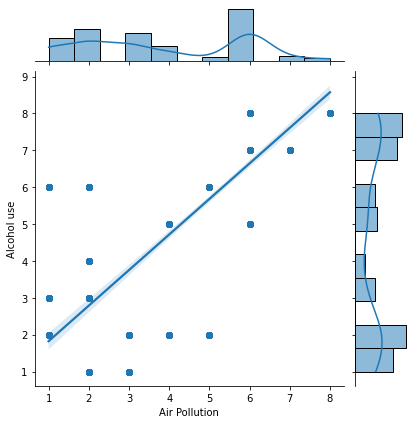

In [ ]:
sns.jointplot("Air Pollution", "Alcohol use", data=lung_df, kind="reg")

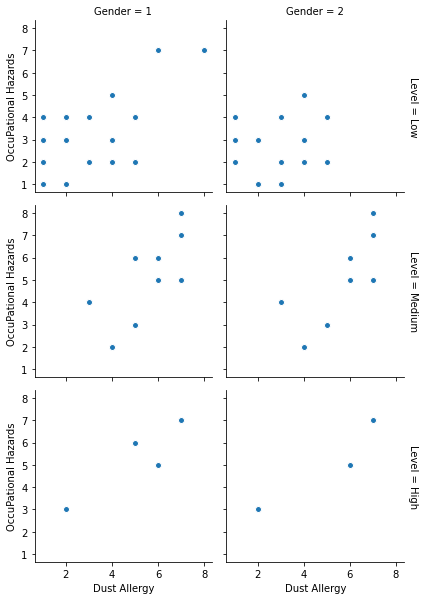

In [ ]:
g = sns.FacetGrid(lung_df, col="Gender", row="Level", margin_titles=True)
g.map(plt.scatter,"Dust Allergy", "OccuPational Hazards",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [ ]:
#There is no linear relationship between occupationhazards and dustallergy and the gender. .

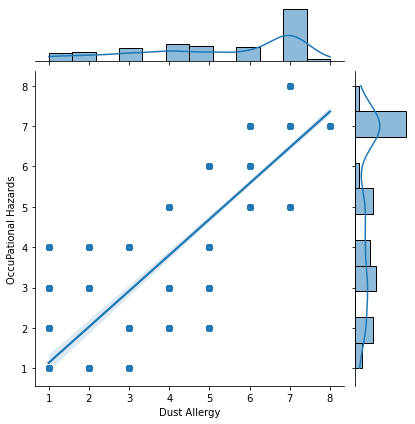

In [ ]:
sns.jointplot("Dust Allergy", "OccuPational Hazards", data=lung_df, kind="reg")

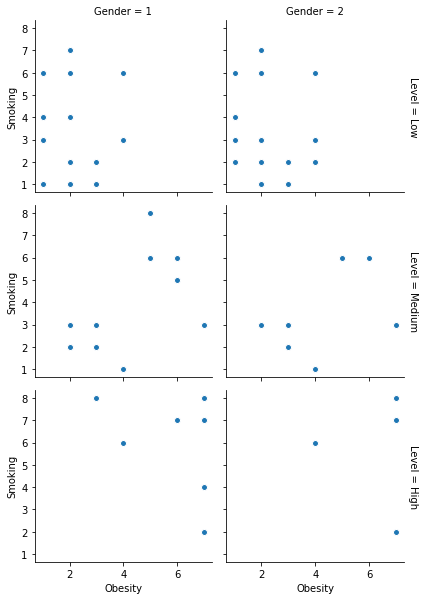

In [ ]:
g = sns.FacetGrid(lung_df, col="Gender", row="Level", margin_titles=True)
g.map(plt.scatter,"Obesity", "Smoking",  edgecolor="w")
plt.subplots_adjust(top=0.9)

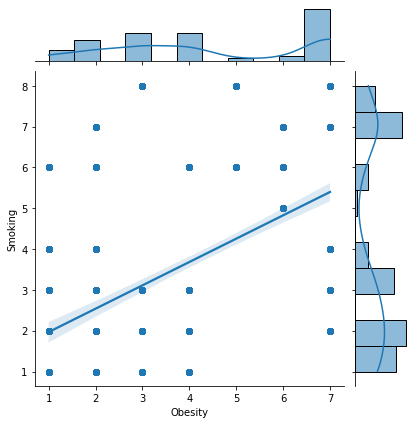

In [ ]:
sns.jointplot("Obesity", "Smoking", data=lung_df, kind="reg")

In [ ]:
#No linear correlation between obesity  and Smoking

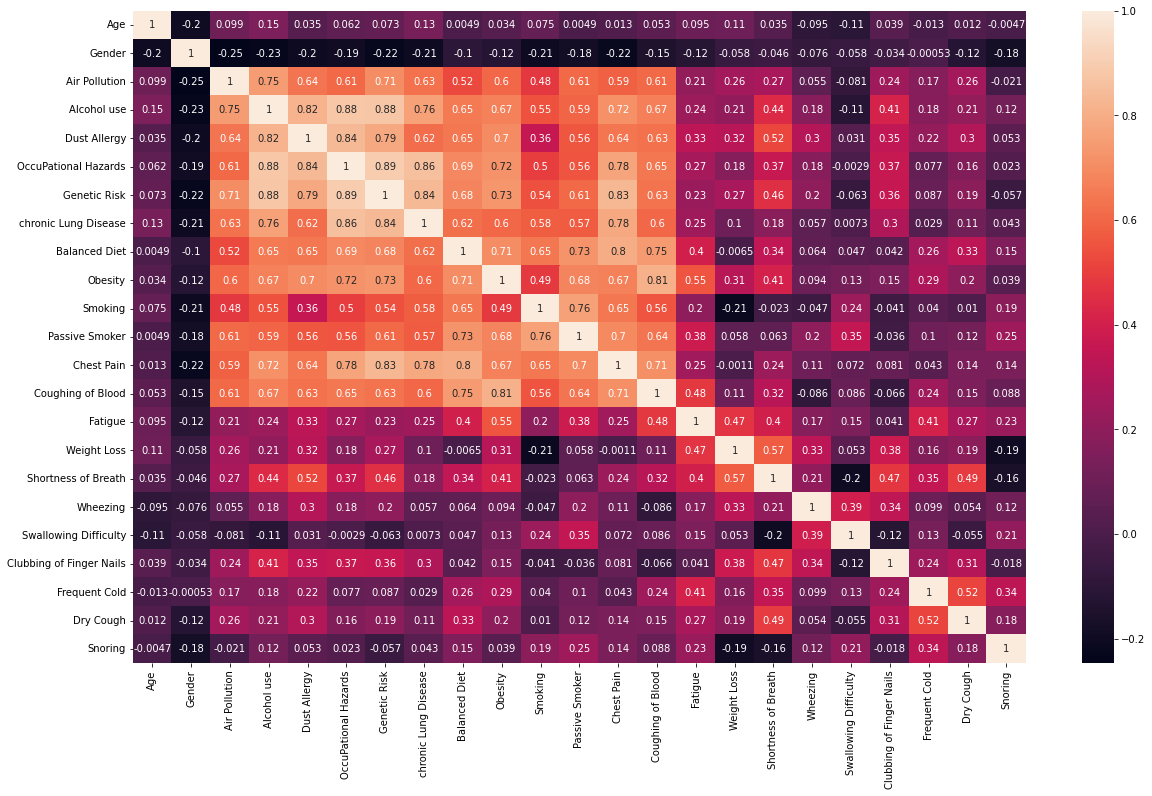

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(lung_df.corr(),annot= True)

In [ ]:
#Though there are a lot of variables to look at we can we can just find the most important ones by using the SelectKBest Algorithm with ANOVA F-ratio statistic

In [ ]:
#Feature Selection
#This method will generate the F-ratio scores of all features and we can determine which ones to use for machine learning.

In [ ]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

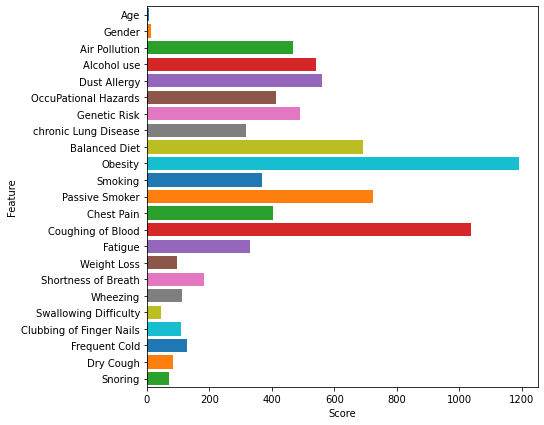

In [ ]:

#Feature Selection
X=lung_df.drop(['Level','Patient Id'], axis=1)
Y=lung_df['Level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='tab10',linewidth=0.5, saturation=2, orient='h')

plot


In [ ]:
#We will take all the features that scored more than 200 as they show the least redundancy.

In [ ]:
#Selection method
selection=featureScores[featureScores['Score']>=200]#Selects features that scored more than 200
selection=list(selection['Feature'])#Generates the features into a list
selection.append('Level')#Adding the Level string to be used to make new data frame
new_data=lung_df[selection] #New dataframe with selected features.
new_data.head(1000) #Lets take a look at the first 1000.

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
1,3,1,5,3,4,2,2,2,2,4,2,3,1,Medium
2,4,5,6,5,5,4,6,7,2,3,4,8,8,High
3,7,7,7,7,6,7,7,7,7,7,7,8,4,High
4,6,8,7,7,7,6,7,7,8,7,7,9,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,6,7,7,7,8,7,7,5,High
996,6,8,7,7,7,6,7,7,7,8,7,7,9,High
997,4,5,6,5,5,4,6,7,2,3,4,8,8,High
998,6,8,7,7,7,6,7,7,8,7,7,9,3,High


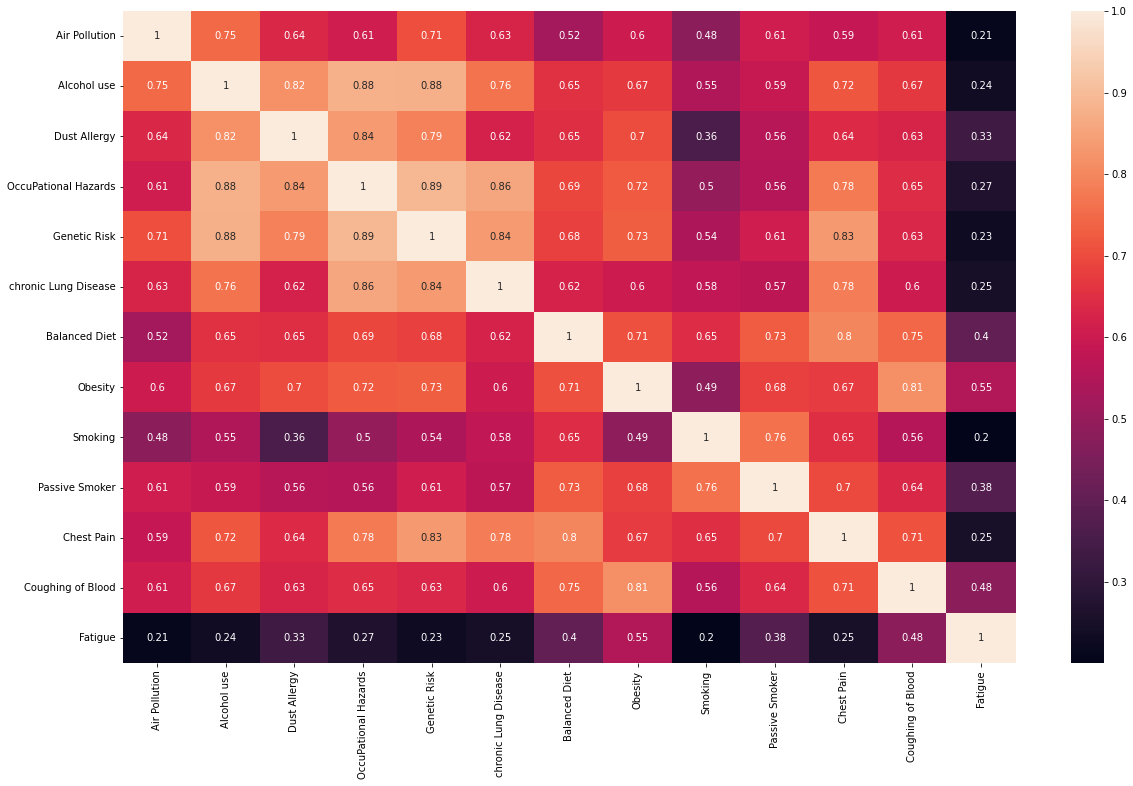

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(new_data.corr(),annot= True)

In [ ]:
X = new_data.drop(['Level'], axis=1)
X.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue
0,2,4,5,4,3,2,2,4,3,2,2,4,3
1,3,1,5,3,4,2,2,2,2,4,2,3,1
2,4,5,6,5,5,4,6,7,2,3,4,8,8
3,7,7,7,7,6,7,7,7,7,7,7,8,4
4,6,8,7,7,7,6,7,7,8,7,7,9,3


In [ ]:
y = new_data['Level']
y.head()

0       Low
1    Medium
2      High
3      High
4      High
Name: Level, dtype: object

# Machine learning


In [ ]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

**Balancing Data**
# Adding randomized samples to the data as the data is imbalanced

In [ ]:
# Adding randomized samples to the data as the data is imbalanced
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((1095, 13), (1095,))

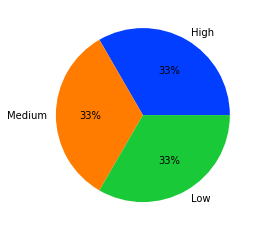

In [ ]:
values = y_train_res.value_counts().tolist()
colors = sns.color_palette('bright')
plt.figure()
plt.pie(values, labels=names,colors = colors, autopct = '%0.0f%%')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(821, 13)
(821,)
(274, 13)
(274,)


**Scaling Preprocessing**

 the data will be scaled by the standard scaler function in the sklearn package using the formula  z=Xo−μ/σ . This can help reduce the effect of outliers when modeling later.

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test_scaled=scaler.transform(X_test) #Transformation of testing set based off of trained scaler model


knnclassifier Test Score: 
 100.0
Accuracy: 
 1.0
[[ 82   0   0]
 [  0  86   0]
 [  0   0 106]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        86
      Medium       1.00      1.00      1.00       106

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



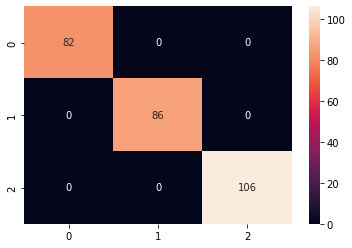

In [ ]:
# KNeighborsClassifier


classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
#Predict Output
classifier_predicted = classifier.predict(X_test)


classifier_score_test = round(classifier.score(X_test, y_test) * 100, 2)

print('knnclassifier Test Score: \n', classifier_score_test)
print('Accuracy: \n', accuracy_score(y_test, classifier_predicted))
print(confusion_matrix(y_test,classifier_predicted))
print(classification_report(y_test,classifier_predicted))

sns.heatmap(confusion_matrix(y_test,classifier_predicted),annot=True,fmt="d")

In [ ]:
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

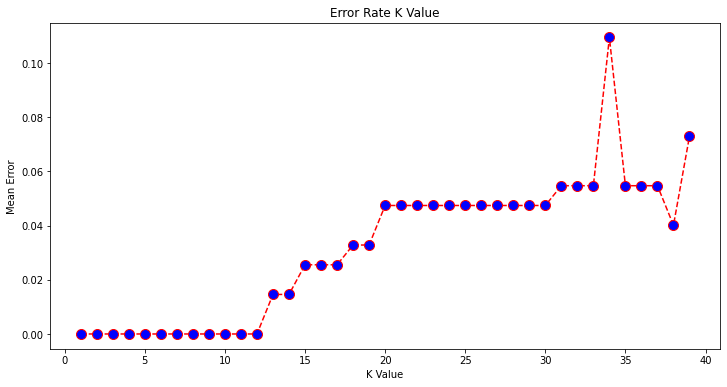

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

svclassifier Test Score: 
 94.89
Accuracy: 
 0.948905109489051
[[ 82   0   0]
 [  0  72  14]
 [  0   0 106]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      0.84      0.91        86
      Medium       0.88      1.00      0.94       106

    accuracy                           0.95       274
   macro avg       0.96      0.95      0.95       274
weighted avg       0.95      0.95      0.95       274



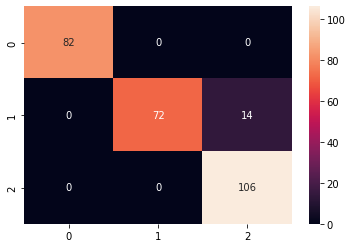

In [ ]:
#SVM
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


#Predict Output
svclassifier_predicted = svclassifier.predict(X_test)


svclassifier_score_test = round(svclassifier.score(X_test, y_test) * 100, 2)

print('svclassifier Test Score: \n', svclassifier_score_test)
print('Accuracy: \n', accuracy_score(y_test, svclassifier_predicted))
print(confusion_matrix(y_test,svclassifier_predicted))
print(classification_report(y_test,svclassifier_predicted))

sns.heatmap(confusion_matrix(y_test,svclassifier_predicted),annot=True,fmt="d")

logistic regression Test Score: 
 90.15
Accuracy: 
 0.9014598540145985
[[82  0  0]
 [ 0 72 14]
 [ 0 13 93]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       0.85      0.84      0.84        86
      Medium       0.87      0.88      0.87       106

    accuracy                           0.90       274
   macro avg       0.91      0.90      0.91       274
weighted avg       0.90      0.90      0.90       274



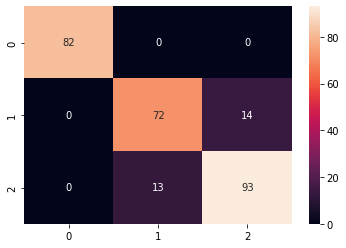

In [ ]:
#Logistic regresion
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predict Output
logreg_predicted = logreg.predict(X_test)


logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

print('logistic regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y_test, logreg_predicted))
print(confusion_matrix(y_test,logreg_predicted))
print(classification_report(y_test,logreg_predicted))

sns.heatmap(confusion_matrix(y_test,logreg_predicted),annot=True,fmt="d")

Gaussian Test Score: 
 71.17
Accuracy: 
 0.7116788321167883
[[75  0  7]
 [ 2 68 16]
 [21 33 52]]
              precision    recall  f1-score   support

        High       0.77      0.91      0.83        82
         Low       0.67      0.79      0.73        86
      Medium       0.69      0.49      0.57       106

    accuracy                           0.71       274
   macro avg       0.71      0.73      0.71       274
weighted avg       0.71      0.71      0.70       274



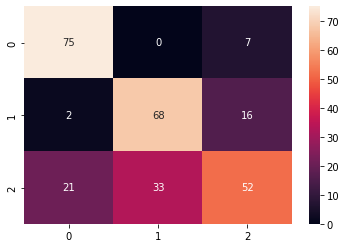

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)


gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)

print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

decision tree Test Score: 
 100.0
Accuracy: 
 1.0
[[ 82   0   0]
 [  0  86   0]
 [  0   0 106]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        86
      Medium       1.00      1.00      1.00       106

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



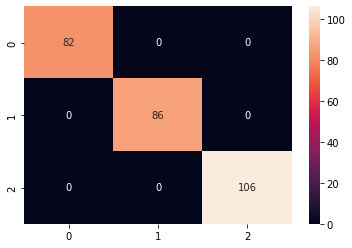

In [ ]:
#Decision tree
dtree=DecisionTreeClassifier()

dtree.fit(X_train, y_train)
#Predict Output
dtree_predicted = dtree.predict(X_test)


dtree_score_test = round(dtree.score(X_test, y_test) * 100, 2)

print('decision tree Test Score: \n', dtree_score_test)
print('Accuracy: \n', accuracy_score(y_test, dtree_predicted))
print(confusion_matrix(y_test,dtree_predicted))
print(classification_report(y_test,dtree_predicted))

sns.heatmap(confusion_matrix(y_test,dtree_predicted),annot=True,fmt="d")

random forest Test Score: 
 100.0
Accuracy: 
 1.0
[[ 82   0   0]
 [  0  86   0]
 [  0   0 106]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        86
      Medium       1.00      1.00      1.00       106

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



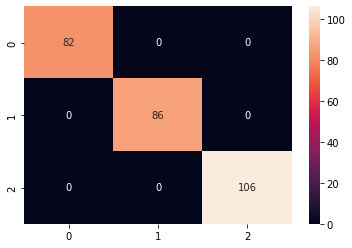

In [ ]:
#Random Forest

rf = RandomForestClassifier(n_estimators = 100)

rf.fit(X_train, y_train)
#Predict Output
rf_predicted = rf.predict(X_test)


rf_score_test = round(rf.score(X_test, y_test) * 100, 2)

print('random forest Test Score: \n', rf_score_test)
print('Accuracy: \n', accuracy_score(y_test, rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

In [ ]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem.
models = pd.DataFrame({
    'Model': [ 'K-NEAREST NEIGHBOUR', 'Gaussian Naive Bayes','SUPPORT VECTOR MACHINE','Logistic regression','Decision Tree','Random Forest'],

    'Test Score': [ classifier_score_test, gauss_score_test, svclassifier_score_test,logreg_score_test,dtree_score_test,rf_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,K-NEAREST NEIGHBOUR,100.00
4,Decision Tree,100.00
5,Random Forest,100.00
2,SUPPORT VECTOR MACHINE,94.89
3,Logistic regression,90.15
1,Gaussian Naive Bayes,71.17


Text(0, 0.5, 'Accuracy')

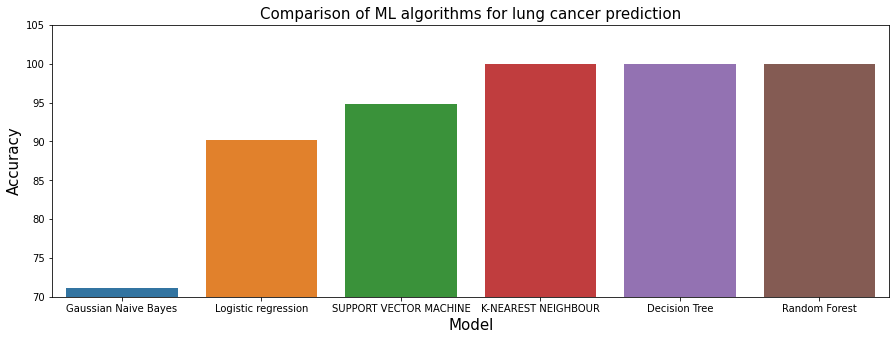

In [ ]:
plt.figure(figsize=(15, 5))

t=sns.barplot(x='Model',y='Test Score', data=models,order=models.sort_values('Test Score').Model)
t.set_ylim(70,105)
plt.title('Comparison of ML algorithms for lung cancer prediction',SIZE=15)
plt.xlabel('Model',size=15)
plt.ylabel('Accuracy', size=15)

**Hyper parameter tuning to improve accuracy**
   
   1.Hyper parameter tuning for Gaussian Naive Bayes

   2.Hyper parameter tuning for Logistic Regression

   3.Hyper parameter tuning for Support Vector Machine
   

In [ ]:
#Hyper parameter tuning for Gaussian Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
Model_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
Data_transformed = PowerTransformer().fit_transform(X_test)

Model_grid.fit(Data_transformed, y_test);

print(Model_grid.best_estimator_)
print(Model_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0657933224657568)
{'var_smoothing': 0.0657933224657568}


accuracy_score on test dataset :  75.18248175182481
[[75  0  7]
 [ 2 79  5]
 [21 33 52]]
              precision    recall  f1-score   support

        High       0.77      0.91      0.83        82
         Low       0.71      0.92      0.80        86
      Medium       0.81      0.49      0.61       106

    accuracy                           0.75       274
   macro avg       0.76      0.77      0.75       274
weighted avg       0.76      0.75      0.74       274



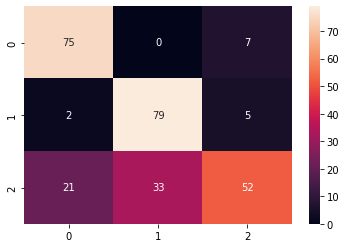

In [ ]:
#Hyper parameter tuning for Gaussian Naive Bayes
# predict the target on the test dataset
hpnb_predicted = Model_grid.predict(Data_transformed)

# Accuracy Score on test dataset
HPGNB_SCORE= (accuracy_score(y_test,hpnb_predicted)*100)
print('accuracy_score on test dataset : ', HPGNB_SCORE)
print(confusion_matrix(y_test,hpnb_predicted))
print(classification_report(y_test,hpnb_predicted))

sns.heatmap(confusion_matrix(y_test,hpnb_predicted),annot=True,fmt="d")

In [ ]:
#Hyper parameter tuning for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
print(logreg_cv.best_params_)

Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
Best score is 1.0
{'C': 2275.845926074791}


accuracy_score on test dataset :  100.0
[[ 82   0   0]
 [  0  86   0]
 [  0   0 106]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        86
      Medium       1.00      1.00      1.00       106

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



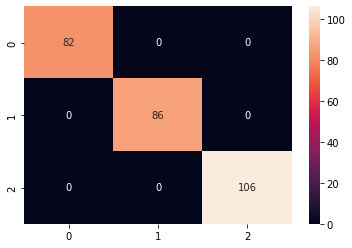

In [ ]:
#Hyper parameter tuning for Logistic Regression
hplg_predicted = logreg_cv.predict(X_test)

# Accuracy Score on test dataset
HPLG_SCORE = (accuracy_score(y_test,hplg_predicted)*100)
print('accuracy_score on test dataset : ', HPLG_SCORE)
print(confusion_matrix(y_test,hplg_predicted))
print(classification_report(y_test,hplg_predicted))

sns.heatmap(confusion_matrix(y_test,hplg_predicted),annot=True,fmt="d")

In [ ]:
#Hyper parameter tuning for Support Vector Machine
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

accuracy_score on test dataset :  100.0
[[ 82   0   0]
 [  0  86   0]
 [  0   0 106]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        86
      Medium       1.00      1.00      1.00       106

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



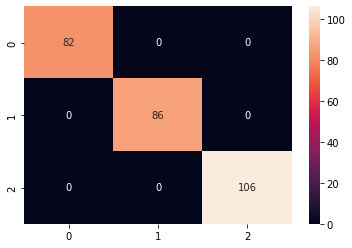

In [ ]:
#Hyper parameter tuning for Support Vector Machine

hpsvm_predicted = grid.predict(X_test)

# Accuracy Score on test dataset
HPSVM_SCORE = (accuracy_score(y_test,hpsvm_predicted)*100)
print('accuracy_score on test dataset : ', HPSVM_SCORE)
print(confusion_matrix(y_test,hpsvm_predicted))
print(classification_report(y_test,hpsvm_predicted))

sns.heatmap(confusion_matrix(y_test,hpsvm_predicted),annot=True,fmt="d")

**MAX VOTING ENSEMBLE TECHNIQUE FOR SVM, LOGISTIC AND NAIVE BAYES FOR BETTER ACCURACY**

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = SVC(gamma ='auto', probability = True)
model3= GaussianNB()
ENSEMBLE1 = VotingClassifier(estimators=[('lr', model1), ('svc', model2),('gnb',model3)], voting='hard')
ENSEMBLE1.fit(X_train,y_train)
ENSEMBLE1.score(X_test,y_test)

0.9124087591240876

In [ ]:
# predict the target on the test dataset
predict_test = ENSEMBLE1.predict(X_test)

# Accuracy Score on test dataset
ENSEMBLE_hard_test = (accuracy_score(y_test,predict_test)*100)
print('accuracy_score on test dataset : ', ENSEMBLE_hard_test)

accuracy_score on test dataset :  91.24087591240875


In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = SVC(gamma ='auto', probability = True)
model3= GaussianNB()
ENSEMBLE2 = VotingClassifier(estimators=[('lr', model1), ('svc', model2),('gnb',model3)], voting='soft')
ENSEMBLE2.fit(X_train,y_train)
ENSEMBLE2.score(X_test,y_test)

1.0

In [ ]:
# predict the target on the test dataset
predict_test = ENSEMBLE2.predict(X_test)

# Accuracy Score on test dataset
ENSEMBLE_soft_test = (accuracy_score(y_test,predict_test)*100)
print('accuracy_score on test dataset : ', ENSEMBLE_soft_test)

accuracy_score on test dataset :  100.0


In [ ]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem.
models = pd.DataFrame({
    'Model': [ 'KNN', 'G NAIVE BAYES','SVM','Logisticregression','Decision Tree','Random Forest','HPTGNB','HPTLG','HPTSVM','ENSEMBLE-soft','ENSEMBLE-hard'],

    'Test Score': [ classifier_score_test, gauss_score_test, svclassifier_score_test,logreg_score_test,dtree_score_test,rf_score_test,HPGNB_SCORE,HPLG_SCORE,HPSVM_SCORE,ENSEMBLE_soft_test,ENSEMBLE_hard_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,KNN,100.000000
4,Decision Tree,100.000000
5,Random Forest,100.000000
7,HPTLG,100.000000
8,HPTSVM,100.000000
9,ENSEMBLE-soft,100.000000
2,SVM,94.890000
10,ENSEMBLE-hard,91.240876
3,Logisticregression,90.150000
6,HPTGNB,75.182482


Text(0, 0.5, 'Accuracy')

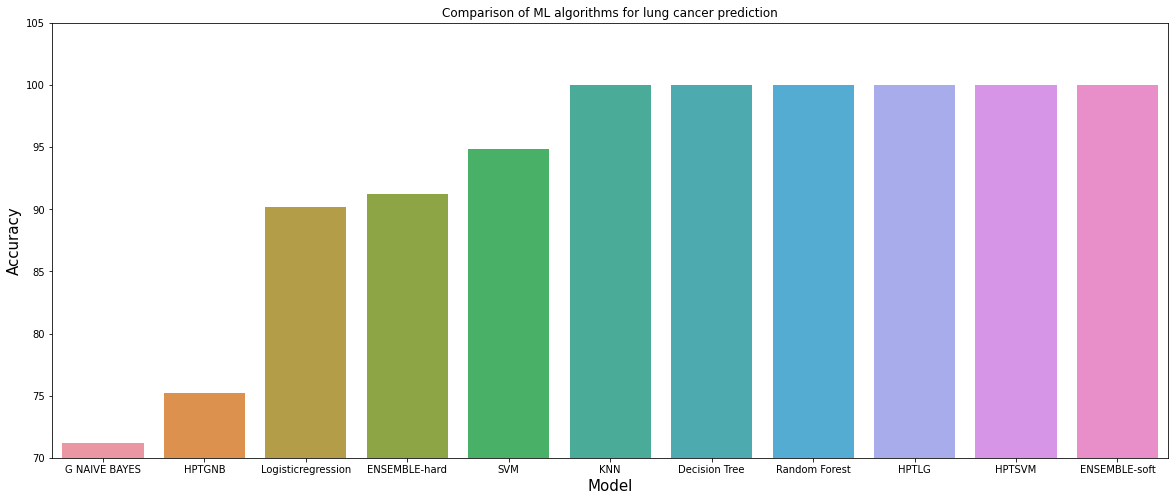

In [ ]:
plt.figure(figsize=(20, 8))

t=sns.barplot(x='Model',y='Test Score', data=models,order=models.sort_values('Test Score').Model)
t.set_ylim(70,105)
plt.title('Comparison of ML algorithms for lung cancer prediction')
plt.xlabel('Model',size=15)
plt.ylabel('Accuracy', size=15)